### Histogram Matching

255 255


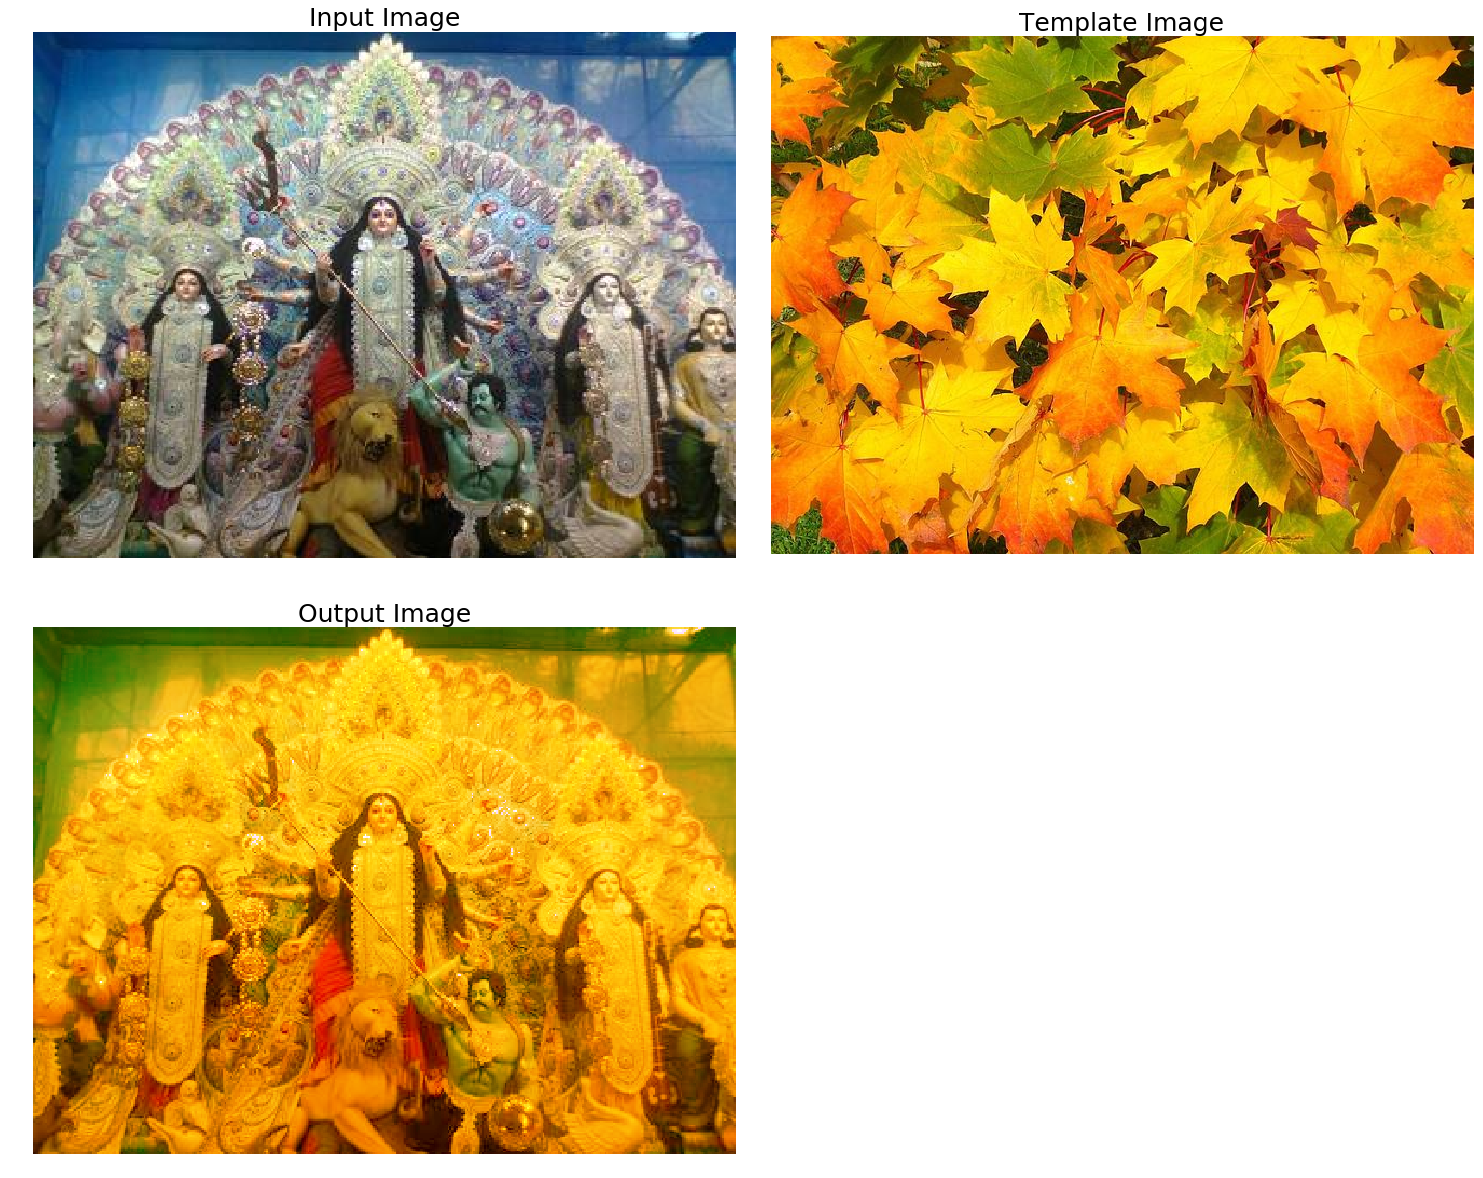

In [136]:
from skimage.exposure import cumulative_distribution
from skimage.color import rgb2gray
import matplotlib.pylab as plt
import numpy as np

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))   # find closest matches to b_t
    pix_repl = {i:b[i] for i in range(256)} # dictionary to replace the pixels
    mp = np.arange(0,256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

def cdf(im):
    c, b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

im = imread('images/goddess.jpg').astype(np.uint8)
im_t = imread('images/leaves.jpg')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])

plt.figure(figsize=(20,17))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=25)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=25)
plt.subplot(223), plt.imshow(im1[...,:3]), plt.axis('off'), plt.title('Output Image', size=25)
plt.show()

### Removing Periodic Noise with LPF / Notch Filter

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


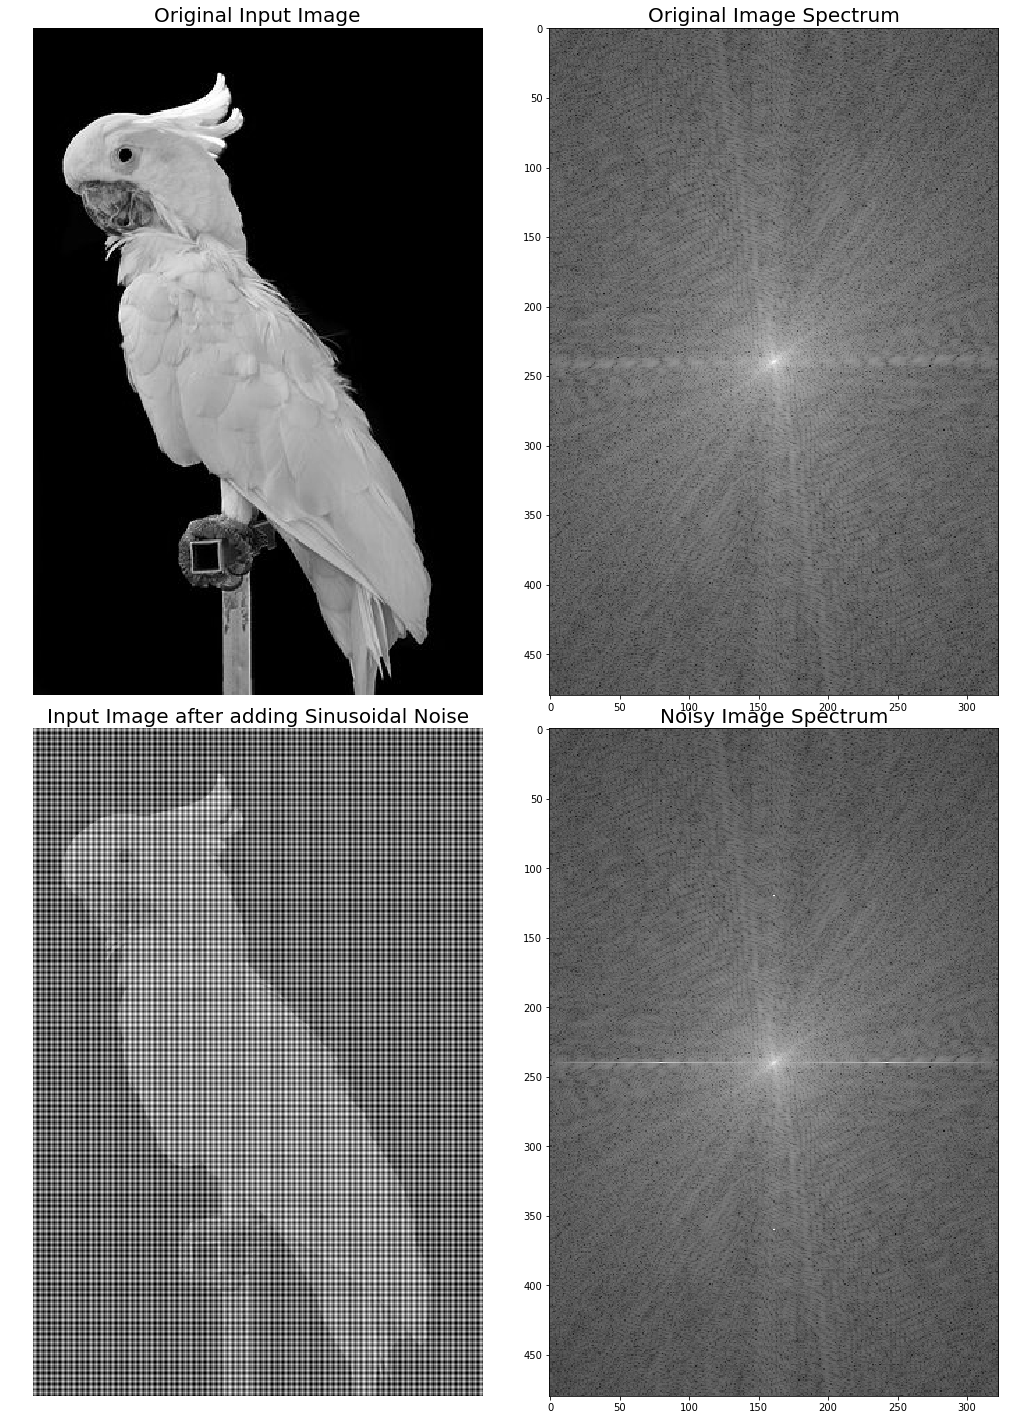

In [121]:
# !pip install --upgrade scipy
% matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
import numpy.fft as fp
from scipy import signal, stats

#print(scipy.__version__)
im = rgb2gray(imread("images/bird.jpg"))
im1 = np.copy(im)

fig=plt.figure(figsize=(14,20))
fig.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(2,2,1) 
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Original Input Image', size=20)
#print(stats.signaltonoise(im, axis=None))
F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift( F1 )
plt.subplot(2,2,2) 
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.xticks(np.arange(0, im.shape[1], 50))
plt.yticks(np.arange(0, im.shape[0], 50))
plt.title('Original Image Spectrum', size=20)

for n in range(im1.shape[0]):
    im1[n, :] += np.sin(0.1*np.pi*n*5)
for n in range(im1.shape[1]):
    im1[:, n] += np.sin(0.1*np.pi*n*5)
    
plt.subplot(2,2,3) 
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.title('Input Image after adding Sinusoidal Noise', size=20)
F1 = fp.fft2((im1).astype(float))
F2 = fp.fftshift( F1 )
plt.subplot(2,2,4) 
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.xticks(np.arange(0, im1.shape[1], 50))
plt.yticks(np.arange(0, im1.shape[0], 50))
plt.title('Noisy Image Spectrum', size=20)
#plt.tight_layout()
plt.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


4.889414324277747 -1.0


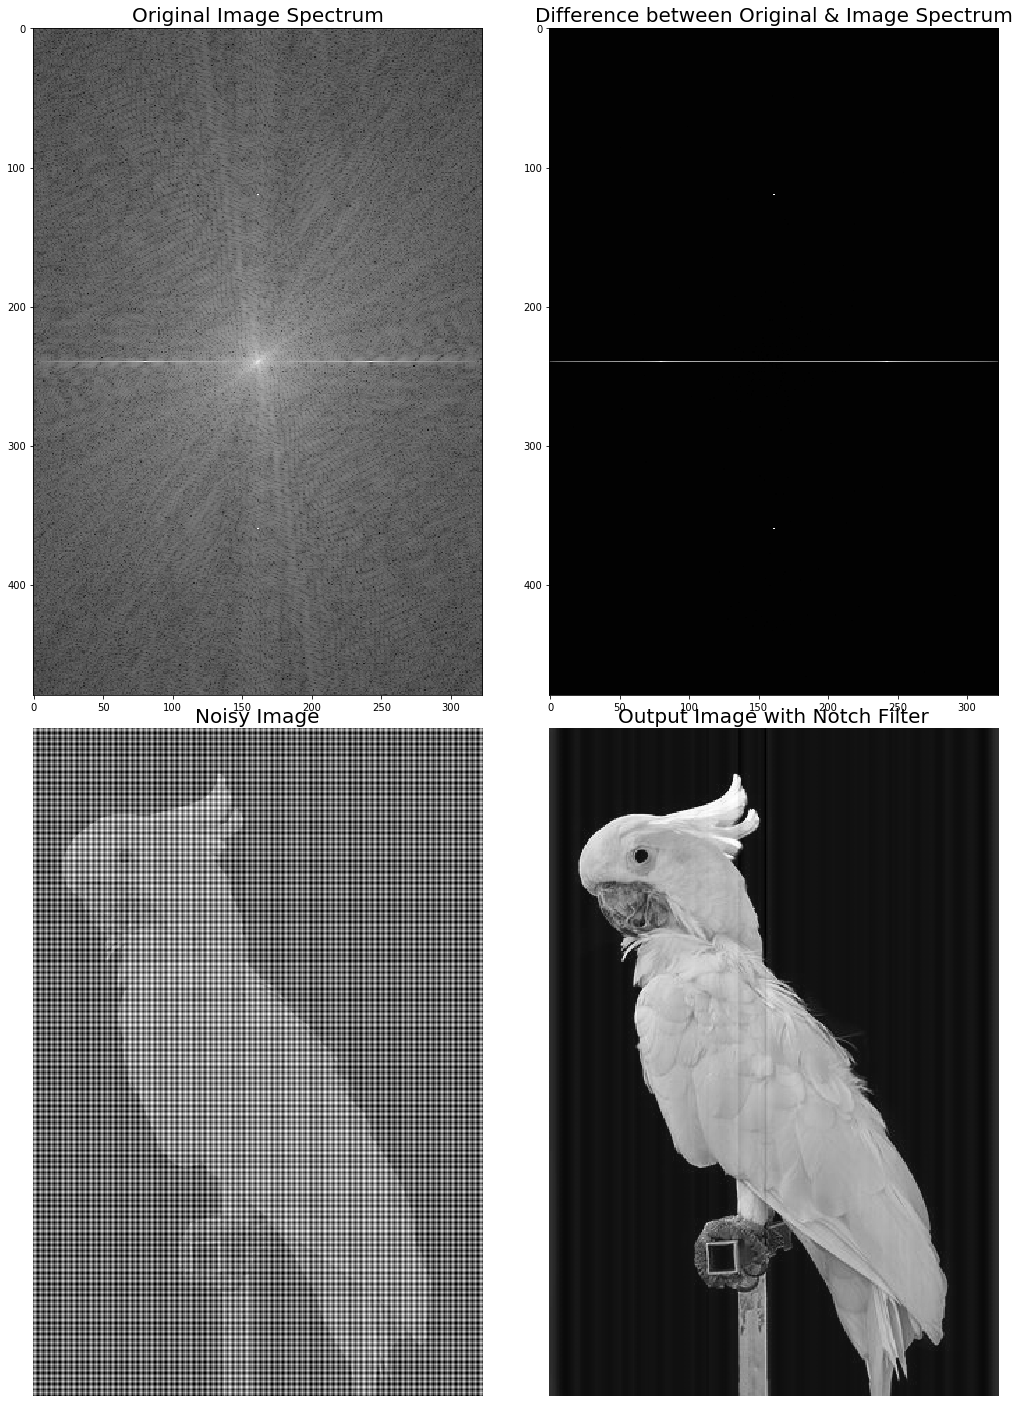

In [122]:
F1o = fp.fft2((im).astype(float))
F2o = fp.fftshift( F1o )
plt.figure(figsize=(14,20))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray), plt.title('Original Image Spectrum', size=20)
print(np.max(np.log10( 0.1 + np.abs(F2-F2o))), np.min(np.log10( 0.1 + np.abs(F2-F2o))))
#print(np.where(abs(F2-F2o) > 0.05))
plt.subplot(222), plt.imshow( (20*np.log10( 0.1 + np.abs(F2-F2o))).astype(int), cmap=plt.cm.gray), plt.title('Difference between Original & Image Spectrum', size=20)
F2[240,:141] = F2[240,181:] = 0
F2[120,161] = F2[360,161] = 0
F1b = fp.ifftshift( F2 )
im2 =  fp.ifft2(F1b).real #np.abs()
#print(stats.signaltonoise(im1, axis=None))
plt.subplot(223), plt.axis('off'), plt.imshow(im1, cmap='gray'), plt.title('Noisy Image', size=20)
plt.subplot(224), plt.axis('off'), plt.imshow(im2, cmap='gray'), plt.title('Output Image with Notch Filter', size=20)
plt.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


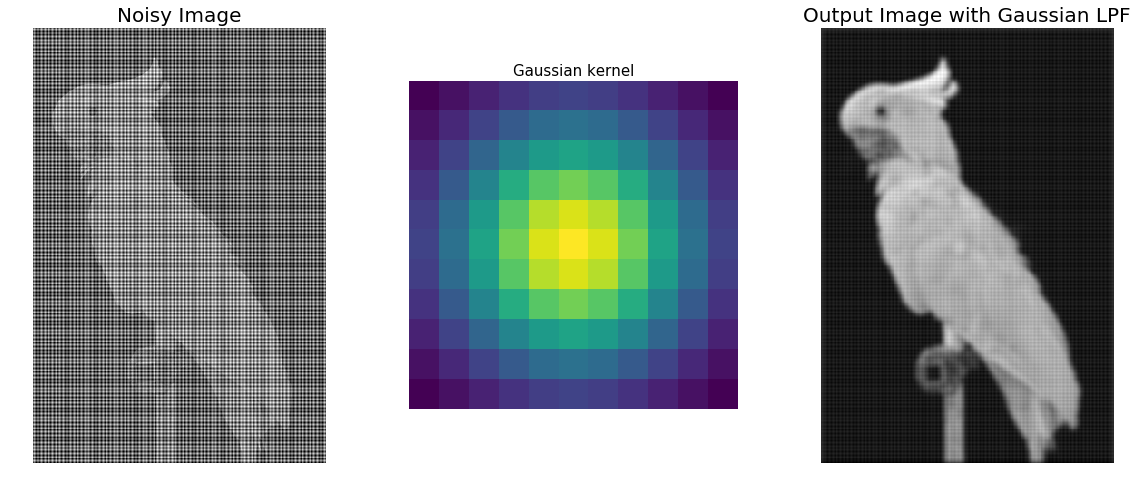

In [123]:
#2D Gaussian kernel of size 11x11 with σ = 3
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) 
im_blurred = signal.fftconvolve(im1, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(20,8))
ax_original.imshow(im1, cmap='gray')
ax_original.set_title('Noisy Image', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Output Image with Gaussian LPF', size=20)
ax_blurred.set_axis_off()
fig.show()

### Fake Miniature

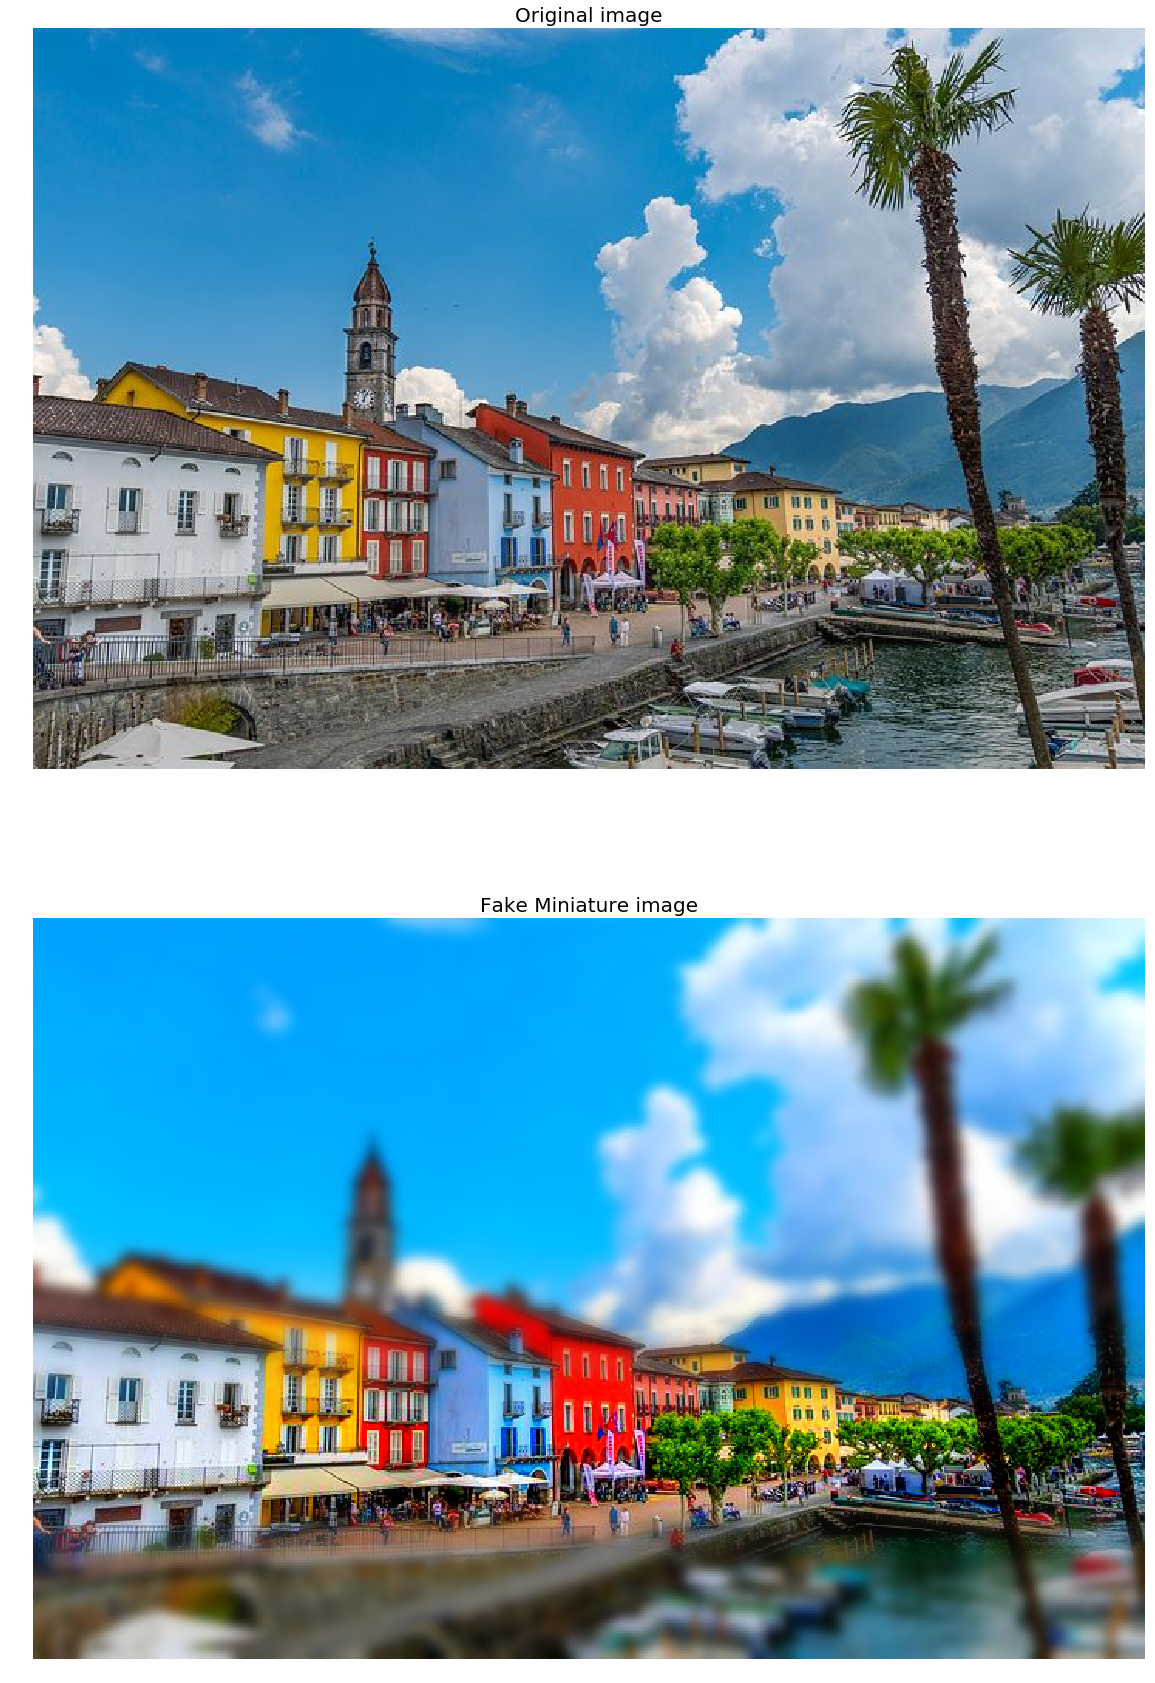

In [124]:
from PIL import Image, ImageEnhance, ImageDraw, ImageOps, ImageFilter
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt, numpy as np

mask_width, mask_height = 640, 480

def create_fake_miniature(im, pts, custom_mask=None, dof=40, color=1.9, contrast=1.4, offset_focus=9):
    # Cranking up the contrast and color
    edited = ImageEnhance.Contrast(ImageEnhance.Color(im).enhance(color)).enhance(contrast)
    # Determining whether we want a focal line mask or a custom mask (bells and whistles)
    if not custom_mask:
        # Creating the mask for a focal line
        offset = int(pts[0][1] / im.size[1] * mask_height)
        #print(pts[0][1], im.size[1], mask_height, offset) 
        va = int(offset + 81.6)
        focus = int(va + offset_focus * 4.8)
        vb = int(focus + 43.2)
        #print(va, vb)
        
        mask, m1 = Image.new('L', (mask_width, mask_height)), Image.new('L', (1, mask_height))
        d1 = ImageDraw.Draw(m1)
        for i in range (0, offset):
            d1.point((0, i), 255)
        for i in range (offset, va):
            d1.point((0, i), int((va - i) * (255 / (va - offset))))
        for i in range (va, focus):
            d1.point((0, i), 0)
        for i in range (focus, vb):
            d1.point((0, i), int(255 - (vb - i) * (255 / (vb - focus))))
        for i in range (vb, mask_height):
            d1.point((0, i), 255)
        mt = ImageOps.invert(ImageOps.invert(m1.resize((int(mask.size[0] * 3), mask.size[1]), Image.ANTIALIAS)).rotate(0, Image.NEAREST, 1))
        mask.convert("RGBA")
        mask.paste(mt,(-mt.size[0] // 2, -(mt.size[1] // 2 - mask_height // 2)))
        mask.convert("L")
        mask = mask.resize(edited.size)
    else:
        #mask = custom_mask.convert("1")
        lol = Image.fromarray(np.uint8(gaussian_filter(np.array(custom_mask, dtype=float), sigma=[3, 3, 0])))
        mask = lol.convert("1")
        # mask = mask.point(lambda i:i*(1./256)).convert('L') #.filter(ImageFilter.SMOOTH)
        #return lol

    # Blurring the image and merging
    if custom_mask:
        im_blur = Image.fromarray(np.uint8(gaussian_filter(np.array(edited, dtype=float), sigma=[1, 1, 0])))
    else:
        im_blur = Image.fromarray(np.uint8(gaussian_filter(np.array(edited, dtype=float), sigma=[4, 4, 0])))
    edited = edited.convert("RGBA")
    edited.paste(im_blur, mask=mask)

    return edited

im = Image.open("images/ascona.jpg")
#mask = Image.open("images/min_mask.jpg")
out = create_fake_miniature(im, [[50, 250]]) #, mask)
plt.figure(figsize=(20,30))
plt.subplot(211), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(212), plt.imshow(out), plt.axis('off'), plt.title('Fake Miniature image', size=20)
plt.show()

### Edge Detection with LOG and Zero-Crossing and Wavelets

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


1.0


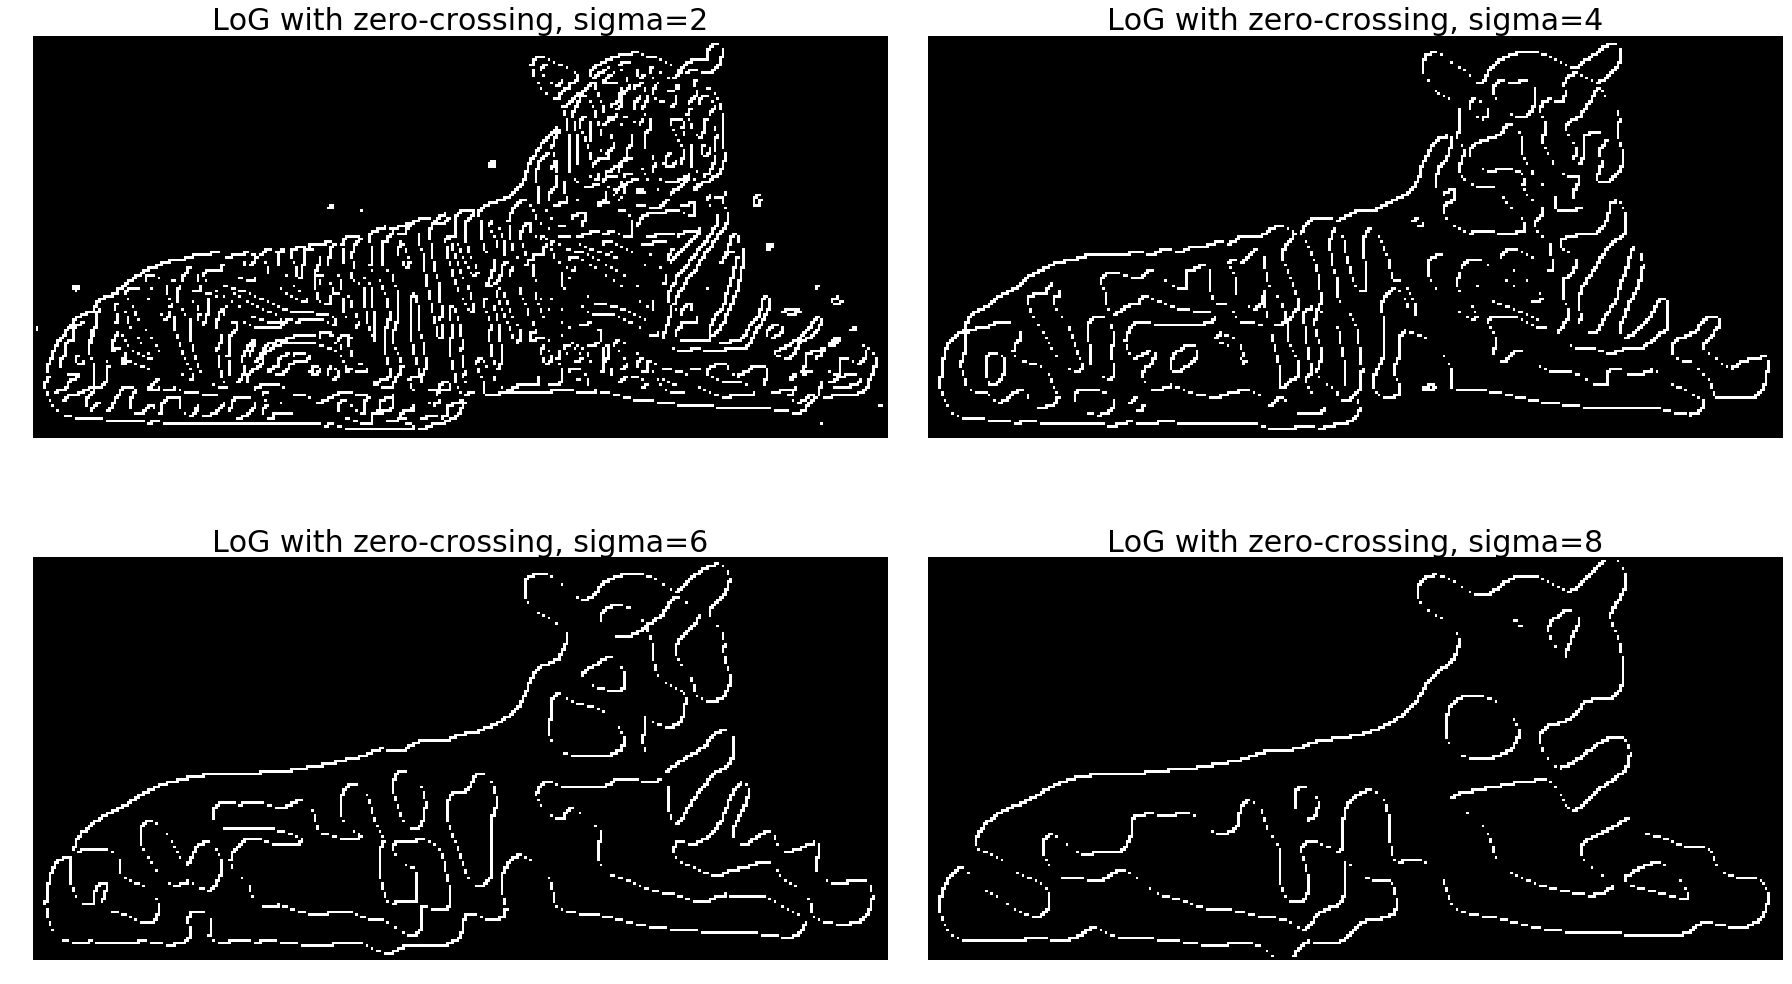

In [217]:
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

def any_neighbor_zero(img, i, j):
    for k in range(-1,2):
      for l in range(-1,2):
         if img[i+k, j+k] == 0:
            return True
    return False

def zero_crossing(img):
  img[img > 0] = 1
  img[img < 0] = 0
  out_img = np.zeros(img.shape)
  for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
      if img[i,j] > 0 and any_neighbor_zero(img, i, j):
        out_img[i,j] = 255
  return out_img

img = rgb2gray(misc.imread('images/tiger.jpg'))

print(np.max(img))
fig = plt.figure(figsize=(25,15))
plt.gray() # show the filtered result in grayscale
for sigma in range(2,10, 2):
    plt.subplot(2,2,sigma/2)
    result = ndimage.gaussian_laplace(img, sigma=sigma)
    result = zero_crossing(result)
    plt.imshow(result)
    plt.axis('off')
    plt.title('LoG with zero-crossing, sigma=' + str(sigma), size=30)

plt.tight_layout()
plt.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


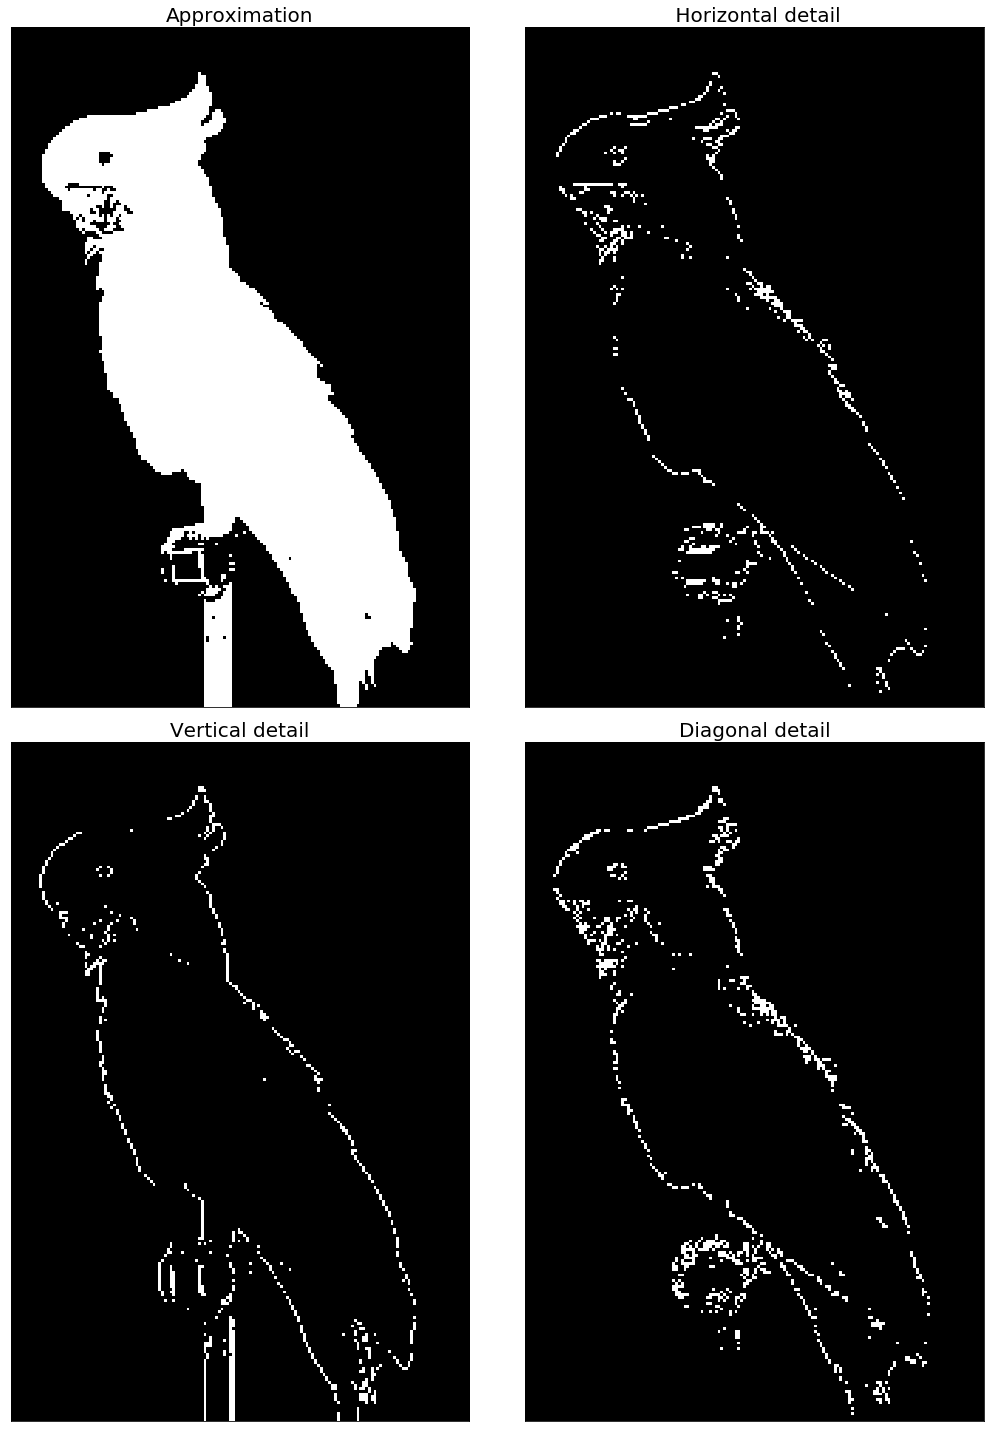

In [252]:
import pywt
from skimage.filters import threshold_otsu
# Load image
original = rgb2gray(misc.imread('images/bird.jpg'))
#original = pywt.data.camera()
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(15, 20))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    a = abs(a)
    #a = np.clip(a, 0, 1)
    th = threshold_otsu(a)
    a[a > th] = 1
    a[a <= th] = 0
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

### Image Denoising with Denoising Autoencoder

(1288, 50, 37)
epoch [1/500], loss:0.6927, MSE_loss:0.0267
epoch [2/500], loss:0.6916, MSE_loss:0.0338
epoch [3/500], loss:0.6871, MSE_loss:0.0216
epoch [4/500], loss:0.6818, MSE_loss:0.0262
epoch [5/500], loss:0.6818, MSE_loss:0.0199
epoch [6/500], loss:0.6766, MSE_loss:0.0182
epoch [7/500], loss:0.6745, MSE_loss:0.0181
epoch [8/500], loss:0.6771, MSE_loss:0.0241
epoch [9/500], loss:0.6706, MSE_loss:0.0261
epoch [10/500], loss:0.6750, MSE_loss:0.0190
epoch [11/500], loss:0.6801, MSE_loss:0.0213
epoch [12/500], loss:0.6795, MSE_loss:0.0201
epoch [13/500], loss:0.6662, MSE_loss:0.0226
epoch [14/500], loss:0.6738, MSE_loss:0.0147
epoch [15/500], loss:0.6707, MSE_loss:0.0148
epoch [16/500], loss:0.6707, MSE_loss:0.0174
epoch [17/500], loss:0.6741, MSE_loss:0.0185
epoch [18/500], loss:0.6717, MSE_loss:0.0174
epoch [19/500], loss:0.6691, MSE_loss:0.0155
epoch [20/500], loss:0.6649, MSE_loss:0.0174
epoch [21/500], loss:0.6643, MSE_loss:0.0154
epoch [22/500], loss:0.6643, MSE_loss:0.0185
epoc

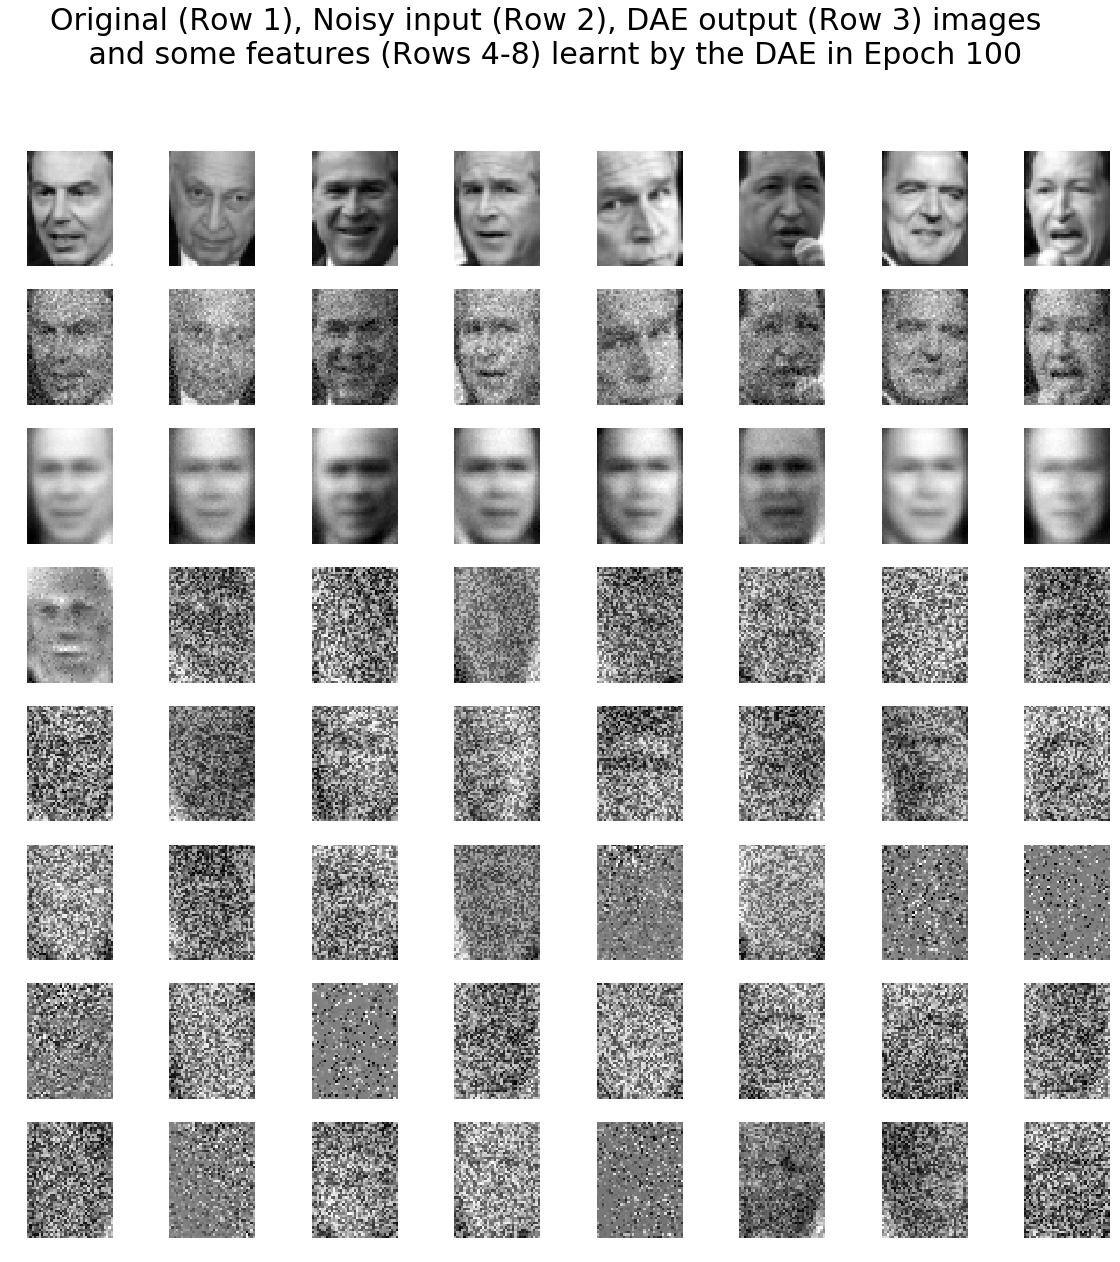

epoch [101/500], loss:0.6519, MSE_loss:0.0109
epoch [102/500], loss:0.6547, MSE_loss:0.0122
epoch [103/500], loss:0.6627, MSE_loss:0.0121
epoch [104/500], loss:0.6590, MSE_loss:0.0137
epoch [105/500], loss:0.6637, MSE_loss:0.0136
epoch [106/500], loss:0.6438, MSE_loss:0.0109
epoch [107/500], loss:0.6614, MSE_loss:0.0105
epoch [108/500], loss:0.6446, MSE_loss:0.0108
epoch [109/500], loss:0.6624, MSE_loss:0.0127
epoch [110/500], loss:0.6525, MSE_loss:0.0149
epoch [111/500], loss:0.6478, MSE_loss:0.0107
epoch [112/500], loss:0.6426, MSE_loss:0.0151
epoch [113/500], loss:0.6590, MSE_loss:0.0158
epoch [114/500], loss:0.6687, MSE_loss:0.0096
epoch [115/500], loss:0.6633, MSE_loss:0.0128
epoch [116/500], loss:0.6334, MSE_loss:0.0145
epoch [117/500], loss:0.6577, MSE_loss:0.0148
epoch [118/500], loss:0.6674, MSE_loss:0.0119
epoch [119/500], loss:0.6667, MSE_loss:0.0122
epoch [120/500], loss:0.6698, MSE_loss:0.0105
epoch [121/500], loss:0.6683, MSE_loss:0.0137
epoch [122/500], loss:0.6619, MSE_

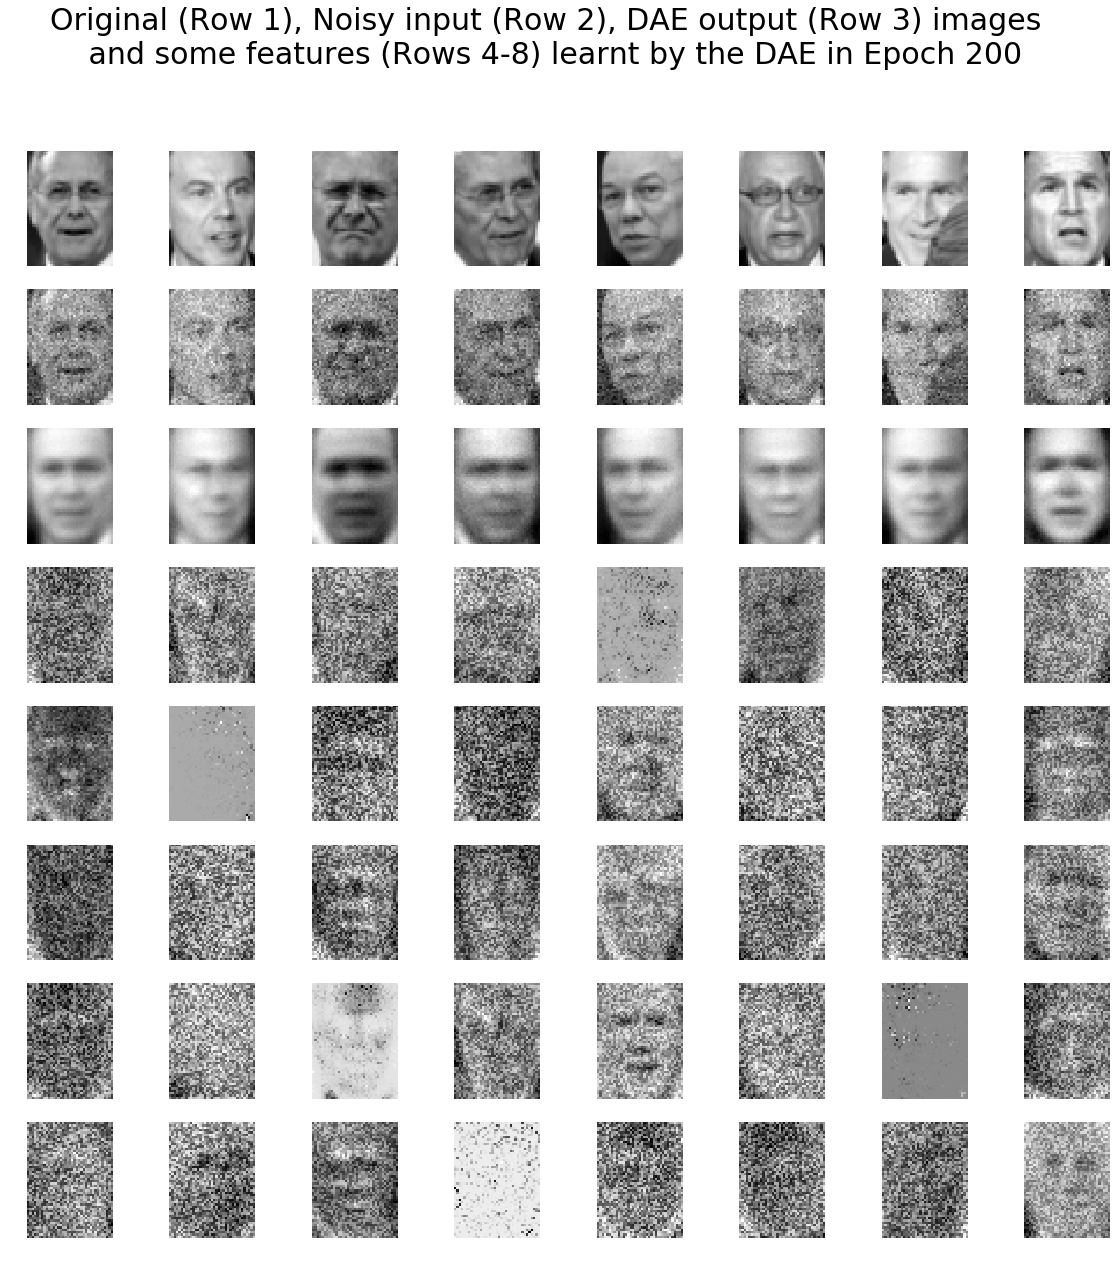

epoch [201/500], loss:0.6581, MSE_loss:0.0100
epoch [202/500], loss:0.6332, MSE_loss:0.0137
epoch [203/500], loss:0.6573, MSE_loss:0.0104
epoch [204/500], loss:0.6533, MSE_loss:0.0110
epoch [205/500], loss:0.6612, MSE_loss:0.0120
epoch [206/500], loss:0.6537, MSE_loss:0.0132
epoch [207/500], loss:0.6505, MSE_loss:0.0103
epoch [208/500], loss:0.6579, MSE_loss:0.0078
epoch [209/500], loss:0.6538, MSE_loss:0.0114
epoch [210/500], loss:0.6502, MSE_loss:0.0098
epoch [211/500], loss:0.6436, MSE_loss:0.0127
epoch [212/500], loss:0.6510, MSE_loss:0.0100
epoch [213/500], loss:0.6505, MSE_loss:0.0100
epoch [214/500], loss:0.6497, MSE_loss:0.0100
epoch [215/500], loss:0.6362, MSE_loss:0.0109
epoch [216/500], loss:0.6626, MSE_loss:0.0111
epoch [217/500], loss:0.6644, MSE_loss:0.0111
epoch [218/500], loss:0.6484, MSE_loss:0.0109
epoch [219/500], loss:0.6527, MSE_loss:0.0114
epoch [220/500], loss:0.6487, MSE_loss:0.0085
epoch [221/500], loss:0.6494, MSE_loss:0.0111
epoch [222/500], loss:0.6508, MSE_

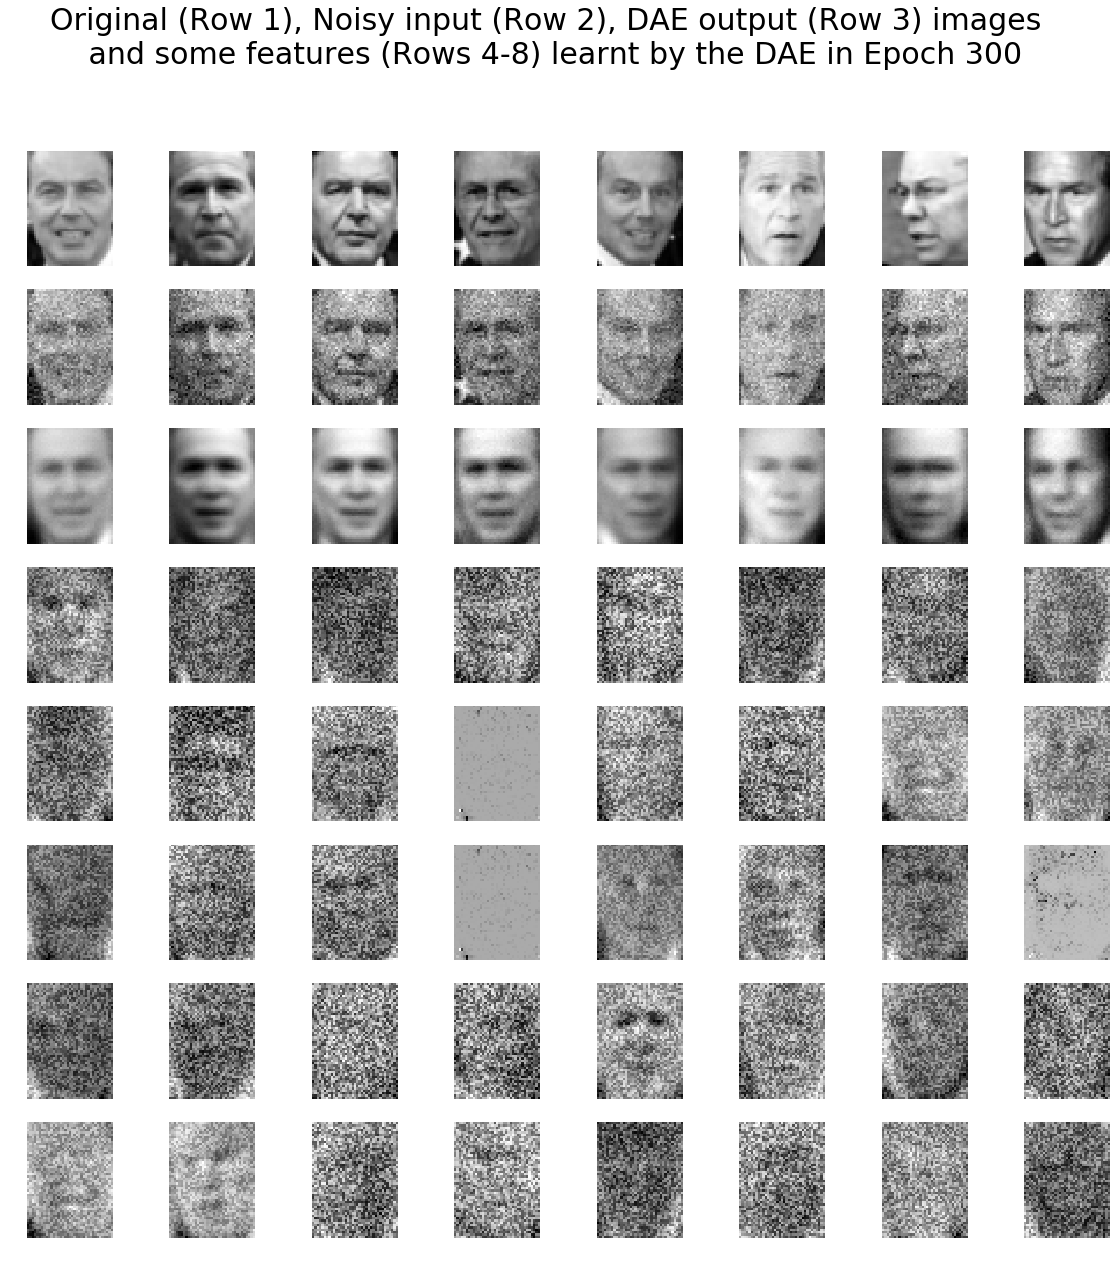

epoch [301/500], loss:0.6488, MSE_loss:0.0087
epoch [302/500], loss:0.6536, MSE_loss:0.0078
epoch [303/500], loss:0.6409, MSE_loss:0.0107
epoch [304/500], loss:0.6548, MSE_loss:0.0062
epoch [305/500], loss:0.6389, MSE_loss:0.0107
epoch [306/500], loss:0.6513, MSE_loss:0.0084
epoch [307/500], loss:0.6409, MSE_loss:0.0104
epoch [308/500], loss:0.6451, MSE_loss:0.0083
epoch [309/500], loss:0.6578, MSE_loss:0.0105
epoch [310/500], loss:0.6470, MSE_loss:0.0086
epoch [311/500], loss:0.6544, MSE_loss:0.0077
epoch [312/500], loss:0.6332, MSE_loss:0.0085
epoch [313/500], loss:0.6374, MSE_loss:0.0103
epoch [314/500], loss:0.6545, MSE_loss:0.0070
epoch [315/500], loss:0.6509, MSE_loss:0.0081
epoch [316/500], loss:0.6475, MSE_loss:0.0098
epoch [317/500], loss:0.6468, MSE_loss:0.0067
epoch [318/500], loss:0.6518, MSE_loss:0.0109
epoch [319/500], loss:0.6587, MSE_loss:0.0091
epoch [320/500], loss:0.6591, MSE_loss:0.0083
epoch [321/500], loss:0.6383, MSE_loss:0.0119
epoch [322/500], loss:0.6536, MSE_

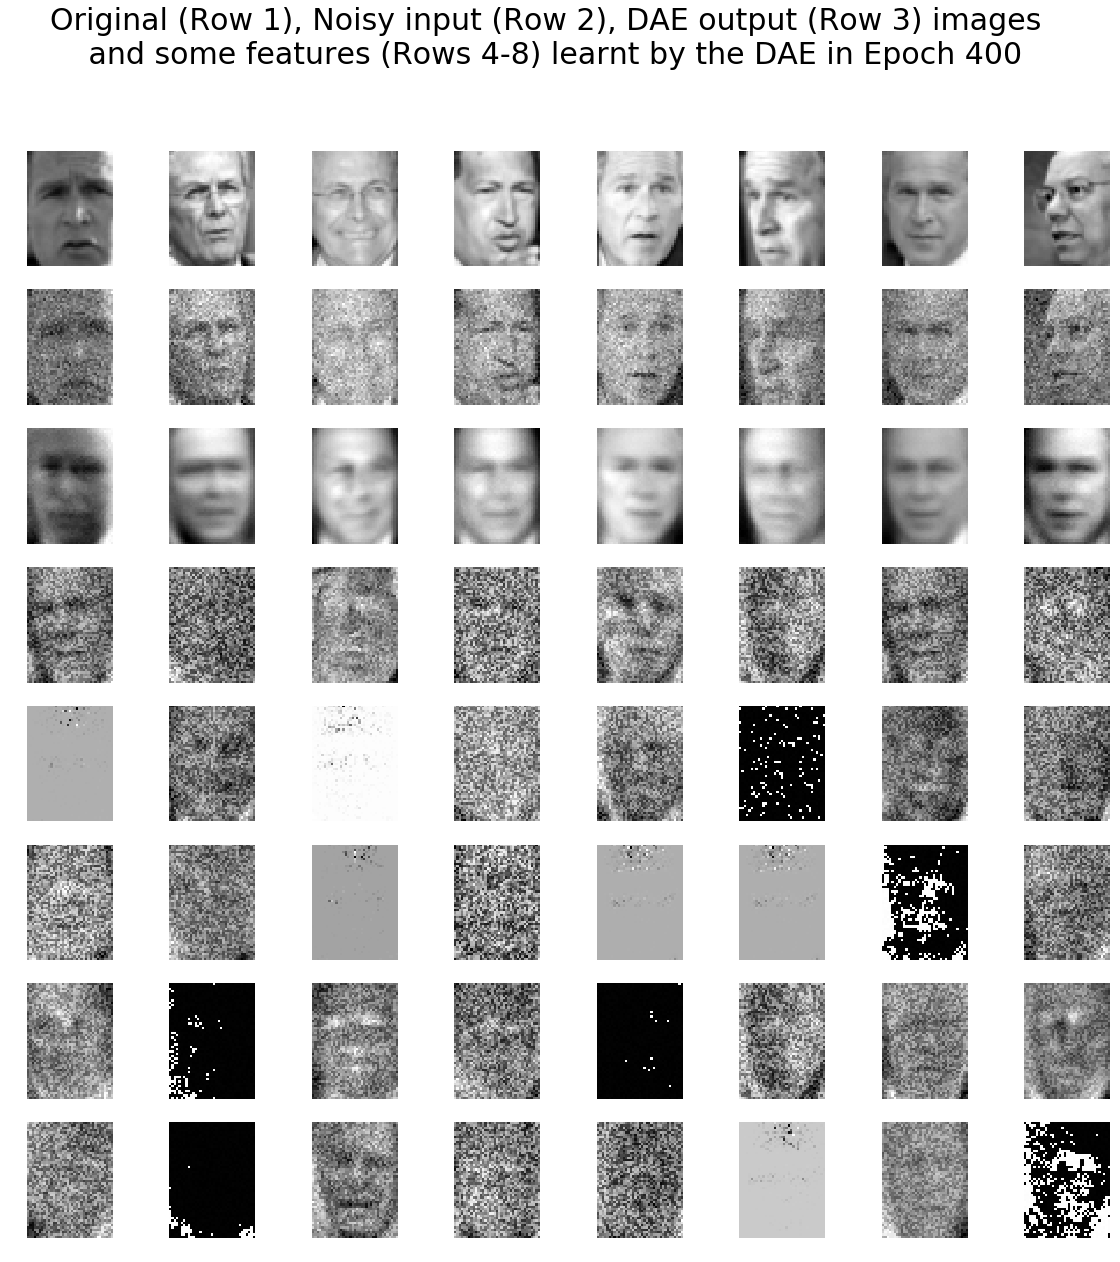

epoch [401/500], loss:0.6487, MSE_loss:0.0077
epoch [402/500], loss:0.6603, MSE_loss:0.0064
epoch [403/500], loss:0.6408, MSE_loss:0.0093
epoch [404/500], loss:0.6527, MSE_loss:0.0081
epoch [405/500], loss:0.6597, MSE_loss:0.0064
epoch [406/500], loss:0.6499, MSE_loss:0.0084
epoch [407/500], loss:0.6574, MSE_loss:0.0074
epoch [408/500], loss:0.6503, MSE_loss:0.0063
epoch [409/500], loss:0.6450, MSE_loss:0.0073
epoch [410/500], loss:0.6449, MSE_loss:0.0058
epoch [411/500], loss:0.6566, MSE_loss:0.0068
epoch [412/500], loss:0.6539, MSE_loss:0.0070
epoch [413/500], loss:0.6414, MSE_loss:0.0089
epoch [414/500], loss:0.6461, MSE_loss:0.0072
epoch [415/500], loss:0.6591, MSE_loss:0.0087
epoch [416/500], loss:0.6352, MSE_loss:0.0112
epoch [417/500], loss:0.6413, MSE_loss:0.0089
epoch [418/500], loss:0.6429, MSE_loss:0.0075
epoch [419/500], loss:0.6350, MSE_loss:0.0102
epoch [420/500], loss:0.6542, MSE_loss:0.0058
epoch [421/500], loss:0.6468, MSE_loss:0.0089
epoch [422/500], loss:0.6390, MSE_

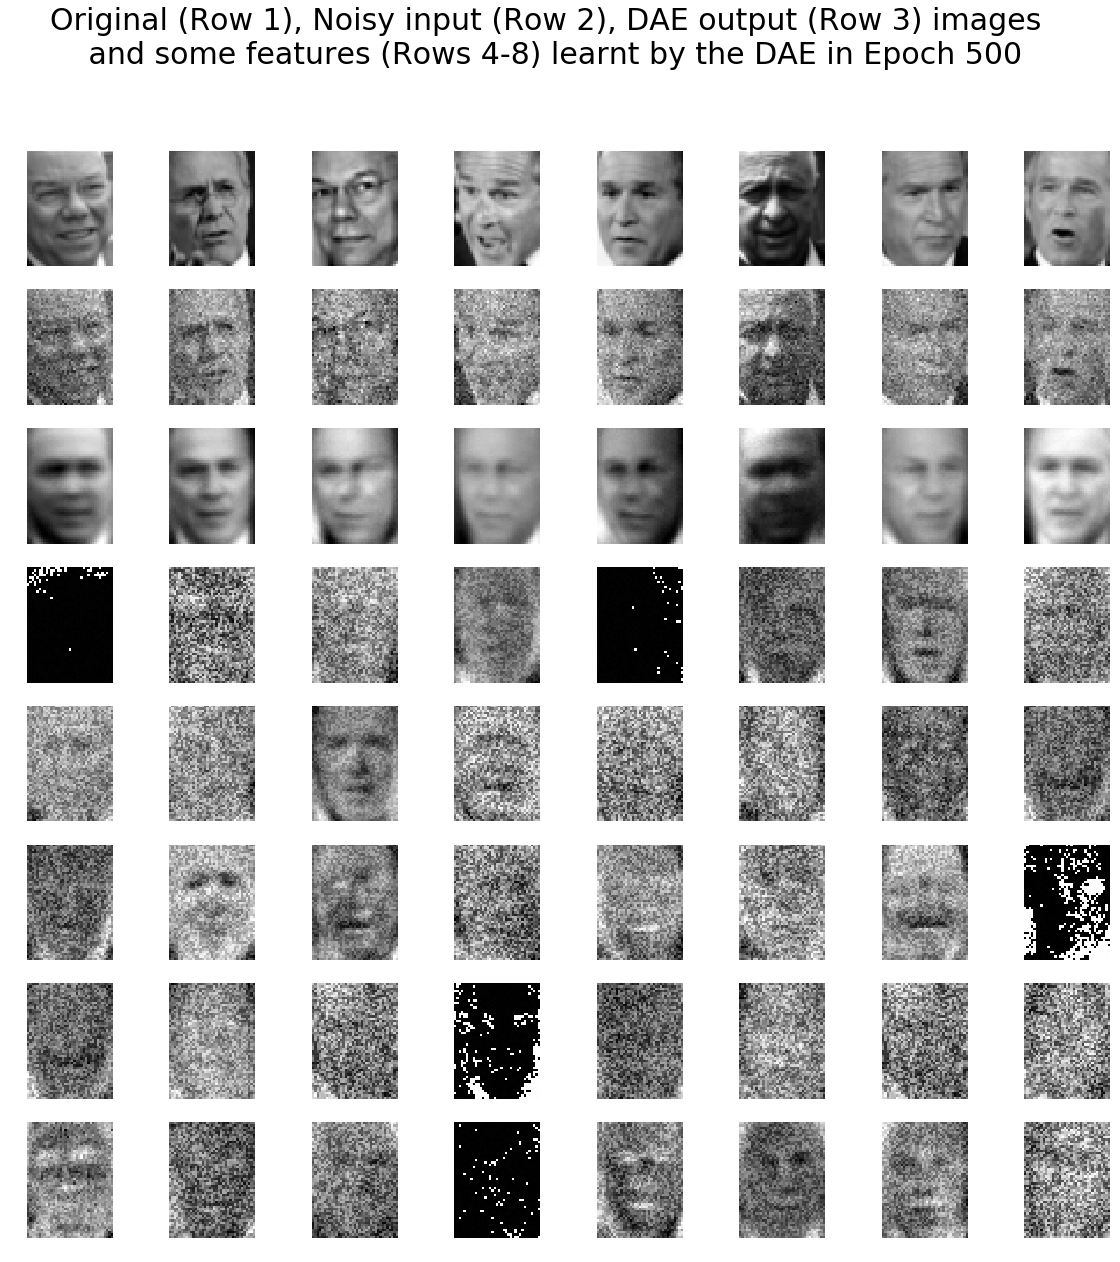

In [2]:
import os
import numpy as np
import matplotlib.pylab as plt

import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image

from sklearn.datasets import fetch_lfw_people

#print(torch.cuda.current_device())
#print(torch.cuda.device(0))
#print(torch.cuda.device_count())
#print(torch.cuda.get_device_name(0))

def to_img(x):
    x = x.view(x.size(0), 1, 50, 37)
    return x

num_epochs = 500 #100
batch_size = 32 # 16
learning_rate = 1e-5
cuda = False #True 


def add_noise(img):
    noise = torch.randn(img.size()) * 0.1
    noisy_img = img + noise
    return noisy_img


def plot_sample_img(img, name):
    img = img.view(1, 50, 37)
    save_image(img, './sample_{}.png'.format(name))


def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor


def tensor_round(tensor):
    return torch.round(tensor)


img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda tensor:min_max_normalization(tensor, 0, 1)),
    transforms.Lambda(lambda tensor:tensor_round(tensor))
])

dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4).images / 255
print(dataset.shape)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(50 * 37, 512),
            nn.ReLU(True),
            nn.Linear(512, 128),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(128, 512),
            nn.ReLU(True),
            nn.Linear(512, 50 * 37),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder()
if cuda:
    model = model.cuda()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(1, num_epochs+1):
    for data in dataloader:
        #img, _ = data
        img = data
        img = img.view(img.size(0), -1)
        noisy_img = add_noise(img)
        noisy_img = Variable(noisy_img)
        if cuda:
            noisy_img = noisy_img.cuda()
        img = Variable(img)
        if cuda:
            img = img.cuda()
        # ===================forward=====================
        output = model(noisy_img)
        loss = criterion(output, img)
        MSE_loss = nn.MSELoss()(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
          .format(epoch, num_epochs, loss.data.item(), MSE_loss.data.item()))
    if epoch % 100 == 0:
        x = to_img(img.cpu().data)
        x_hat = to_img(output.cpu().data)
        x_noisy = to_img(noisy_img.cpu().data)
        weights = to_img(model.encoder[0].weight.cpu().data)
        plt.figure(figsize=(20,20))
        plt.gray()
        for i in range(8):
            plt.subplot(8,8,i+1), plt.imshow(x.data.numpy()[i,0,...]), plt.axis('off')
        for i in range(8):
            plt.subplot(8,8,i+9), plt.imshow(x_noisy.data.numpy()[i,0,...]), plt.axis('off')
        for i in range(8):
            plt.subplot(8,8,i+17), plt.imshow(x_hat.data.numpy()[i,0,...]), plt.axis('off')
        indices = np.random.choice(512, 40)
        for i in range(40):
            plt.subplot(8,8,i+25), plt.imshow(weights.data.numpy()[indices[i],0,...]), plt.axis('off')
        plt.suptitle('Original (Row 1), Noisy input (Row 2), DAE output (Row 3) images \n and some features (Rows 4-8) learnt by the DAE in Epoch {}'.format(epoch), size=30)
        plt.show()
        #print(weights.shape)

#torch.save(model.state_dict(), './sim_dautoencoder.pth')